In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### First attempt to get population estimates to plot

In [161]:
pop_est = pd.read_csv('../data/nst-est2018-alldata.csv')
pop_est.head(3)

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833


In [162]:
pop_est_tn = pop_est.loc[pop_est.NAME == 'Tennessee']

In [163]:
pop_est_tn = pop_est_tn[['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
                        'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
                        'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018']]
pop_est_tn

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
47,6355301,6397410,6451281,6493432,6540826,6590808,6645011,6708794,6770010


In [164]:
melted_tn_pop = pop_est_tn.melt()
melted_tn_pop.columns = ['month_year', 'estimate']

In [165]:
melted_tn_pop.month_year = 'Jul-' + melted_tn_pop.month_year.str[11:]
melted_tn_pop.estimate = melted_tn_pop.estimate/1000
melted_tn_pop.head(2)

,month_year,estimate
0,Jul-2010,6355.301
1,Jul-2011,6397.410


### Second attempt to get population estimates for the labor force

In [148]:
pep2018 = pd.read_csv('../data/PEP_2018_PEPAGESEX.csv')
pep2018.head()


,GEO.id,GEO.id2,GEO.display-label,cen42010sex0_age999,cen42010sex1_age999,cen42010sex2_age999,est42010sex0_age999,est42010sex1_age999,est42010sex2_age999,est72010sex0_age999,...,est72015sex2_medage,est72016sex0_medage,est72016sex1_medage,est72016sex2_medage,est72017sex0_medage,est72017sex1_medage,est72017sex2_medage,est72018sex0_medage,est72018sex1_medage,est72018sex2_medage
0,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; T...","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Bo...,...,Population Estimate (as of July 1) - 2015 - Fe...,Population Estimate (as of July 1) - 2016 - Bo...,Population Estimate (as of July 1) - 2016 - Ma...,Population Estimate (as of July 1) - 2016 - Fe...,Population Estimate (as of July 1) - 2017 - Bo...,Population Estimate (as of July 1) - 2017 - Ma...,Population Estimate (as of July 1) - 2017 - Fe...,Population Estimate (as of July 1) - 2018 - Bo...,Population Estimate (as of July 1) - 2018 - Ma...,Population Estimate (as of July 1) - 2018 - Fe...
1,0100000US,NaN,United States,308745538,151781326,156964212,308758105,151788777,156969328,309326085,...,39.1,37.9,36.6,39.2,38.0,36.8,39.4,38.2,36.9,39.5
2,0400000US01,01,Alabama,4779736,2320188,2459548,4780138,2320484,2459654,4785448,...,40.1,38.9,37.4,40.3,39.0,37.6,40.5,39.2,37.8,40.7
3,0400000US02,02,Alaska,710231,369628,340603,710249,369642,340607,713906,...,34.4,34.0,33.6,34.5,34.3,33.8,34.8,34.6,34.1,35.1
4,0400000US04,04,Arizona,6392017,3175823,3216194,6392288,3176042,3216246,6407774,...,38.5,37.3,36.1,38.7,37.7,36.4,39.0,37.9,36.6,39.3


In [149]:
pep2018 = pep2018.loc[pep2018['GEO.display-label'] == 'Tennessee']

In [150]:
cols = pd.read_csv('../data/PEP_2018_PEPAGESEX_metadata.csv', skiprows=2)
cols.columns = ['name', 'meaning']

In [152]:
def find_columns(col_list):
    age_list = ['15', '20', '25', '30', '35', '40', 
                '45', '50', '55', '60', '65', '70', 
                '75', '80', '85']
    col_matches = [ 'sex0_age' + age for age in age_list ]
    cols_to_keep = [ col for col in col_list if col[8:18] in col_matches ]
    return cols_to_keep

In [153]:
cols_to_keep = find_columns(list(cols.name))
cols_to_keep = [col for col in cols_to_keep if col[0:4] == 'est7']


In [155]:
pep2018 = pep2018[cols_to_keep]
pep2018.head()

,est72010sex0_age15to19,est72011sex0_age15to19,est72012sex0_age15to19,est72013sex0_age15to19,est72014sex0_age15to19,est72015sex0_age15to19,est72016sex0_age15to19,est72017sex0_age15to19,est72018sex0_age15to19,est72010sex0_age20to24,...,est72018sex0_age85plusr,est72010sex0_age15to44,est72011sex0_age15to44,est72012sex0_age15to44,est72013sex0_age15to44,est72014sex0_age15to44,est72015sex0_age15to44,est72016sex0_age15to44,est72017sex0_age15to44,est72018sex0_age15to44
44,434945,427380,421746,418295,417640,420185,422928,424908,425325,428827,...,120062,2541257,2545833,2560581,2570009,2580210,2589538,2599558,2619979,2642316


In [179]:
summary_pop_tn = pep2018.melt()
summary_pop_tn['year'] = summary_pop_tn.variable.str[4:8]
summary_pop_tn.head()

,variable,value,year
0,est72010sex0_age15to19,434945,2010
1,est72011sex0_age15to19,427380,2011
2,est72012sex0_age15to19,421746,2012
3,est72013sex0_age15to19,418295,2013
4,est72014sex0_age15to19,417640,2014


In [180]:
summary_pop_tn.value = summary_pop_tn.value.astype(int)

In [181]:
agg_15_up = summary_pop_tn.groupby('year').agg('sum').reset_index()
agg_15_up.columns = ('month_year', 'pop_estimate')

In [182]:
agg_15_up.month_year = 'Jul-' + agg_15_up.month_year

In [183]:
agg_15_up.pop_estimate = agg_15_up.pop_estimate/1000

In [184]:
agg_15_up

,month_year,pop_estimate
0,Jul-2010,6006.3275
1,Jul-2011,6050.0735
2,Jul-2012,6105.7020
3,Jul-2013,6151.5880
4,Jul-2014,6204.8845
5,Jul-2015,6262.0905
6,Jul-2016,6323.2085
7,Jul-2017,6395.4605
8,Jul-2018,6466.6800


### Third attempt at labor force estimates - manually retrieved from
 - https://www.tn.gov/workforce/general-resources/major-publications0/major-publications-redirect/public-reports-redirect/labor-force-estimates.html

In [198]:
data = {'month_year': ['Jul-2010', 'Jul-2011', 'Jul-2012','Jul-2013', 'Jul-2014', 'Jul-2015', 'Jul-2016', 'Jul-2017', 'Jul-2018'], 
        'estimate': [3056.7, 3132.7, 3141.5, 3067.4, 3022.9, 3062.7, 3134.7, 3198.8, 3253.8]}

In [199]:
labor_force = pd.DataFrame(data = data)
labor_force.head()

,month_year,estimate
0,Jul-2010,3056.7
1,Jul-2011,3132.7
2,Jul-2012,3141.5
3,Jul-2013,3067.4
4,Jul-2014,3022.9


In [166]:
jobs = pd.read_excel('../data/SWXX 2019--jobs.xlsm', 'Jobs', na_values = '*')
jobs.head(3)

,seasonal,year,super,month,United States,Alabama,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Unnamed: 56
0,S,1990,Total Nonfarm,January,109197.0,1636.8,230.8,1473.4,912.5,12495.2,...,2191.7,7028.6,712.5,261.5,2901.5,2122.2,606.9,2268.7,195.7,NaN
1,S,1990,Total Nonfarm,February,109435.0,1634.9,233.0,1475.8,912.3,12500.7,...,2195.1,7038.5,712.8,260.1,2907.6,2126.1,607.4,2278.7,196.3,NaN
2,S,1990,Total Nonfarm,March,109644.0,1633.0,235.4,1478.5,915.6,12503.6,...,2199.4,7057.6,715.6,259.9,2911.3,2131.1,611.9,2280.6,197.5,NaN


In [167]:
tn_jobs = jobs[['seasonal', 'year', 'super', 'month', 'Tennessee']]
tn_jobs.head(3)

,seasonal,year,super,month,Tennessee
0,S,1990,Total Nonfarm,January,2191.7
1,S,1990,Total Nonfarm,February,2195.1
2,S,1990,Total Nonfarm,March,2199.4


In [168]:
tn_jobs = tn_jobs.loc[tn_jobs.year.isin(['2010', '2011', '2012', '2013',
                                        '2014', '2015', '2016', '2017', 
                                         '2018'])]
tn_jobs.shape

(4914, 5)

In [169]:
tn_nonfarm = tn_jobs.loc[tn_jobs.super == 'Total Nonfarm']
tn_nonfarm.shape

(234, 5)

In [170]:
tn_nonfarm['month_year'] = tn_nonfarm.month.str[0:3] + '-' + tn_nonfarm.year.astype(str)
tn_nonfarm.head(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,seasonal,year,super,month,Tennessee,month_year
260,S,2010,Total Nonfarm,January,2596.7,Jan-2010
261,S,2010,Total Nonfarm,February,2592.7,Feb-2010
262,S,2010,Total Nonfarm,March,2596.2,Mar-2010


In [171]:
tn_nonfarm = tn_nonfarm.rename(columns = {'Tennessee': 'job_count'})

In [172]:
tn_nonfarm.job_count = tn_nonfarm.job_count.astype(float)

In [174]:
tn_nonfarm = tn_nonfarm.loc[tn_nonfarm.month != 'Annual']

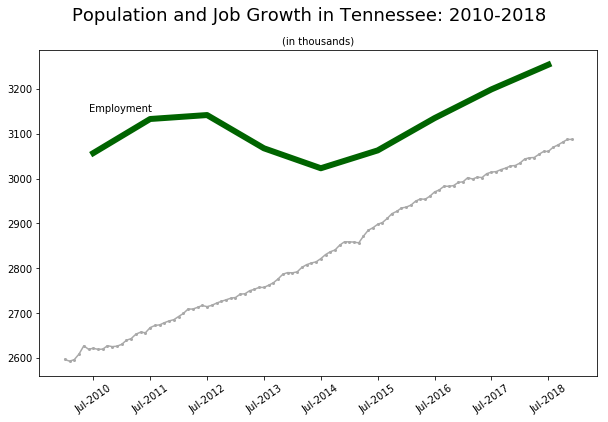

In [204]:
seasonal = tn_nonfarm.loc[tn_nonfarm.seasonal == 'S']
nonseasonal = tn_nonfarm.loc[tn_nonfarm.seasonal == 'U']

plt.figure(figsize = (10, 6))
plt.plot('month_year', 'job_count', marker = 'o', markersize = 2, 
         data = seasonal, color = 'darkgray')
plt.plot('month_year', 'estimate', data = labor_force, color = 'darkgreen', linewidth = 6)
plt.annotate(s='Employment', xy = (0, 3150))
plt.annotate(s='Jobs needed to keep up with population growth', xy = (5, 3170), color = 'darkgreen')
plt.suptitle('Population and Job Growth in Tennessee: 2010-2018', fontsize = 18)
plt.title('(in thousands)', fontsize = 10)
plt.xticks(['Jul-2010', 'Jul-2011', 'Jul-2012', 'Jul-2013', 'Jul-2014',
            'Jul-2015', 'Jul-2016', 'Jul-2017', 'Jul-2018'], rotation = 35)
plt.savefig('population_and_jobs.png');